Импортируем необходимые библиотеки. 
Для обработки звуковых дорожек используем librosa, несколько библиотек для визуализации (напр. geopandas для визуализации гео данных) и несколько классических библиотек для работы с данными.

In [1]:
import os

import csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

import librosa

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [170]:
from pydub import AudioSegment

x , sr = librosa.load('Project/Ardea.ogg') #первая компонента - временной ряд, вторая - частота дискретизации, по ум. 22050 Гц

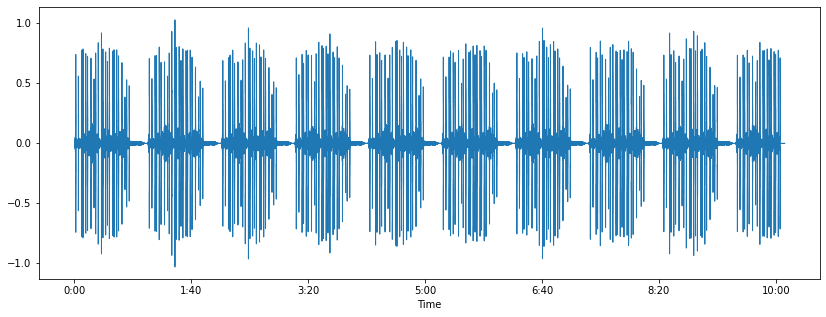

In [3]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
#Мы получили график амплитудной огибающей сигнала.

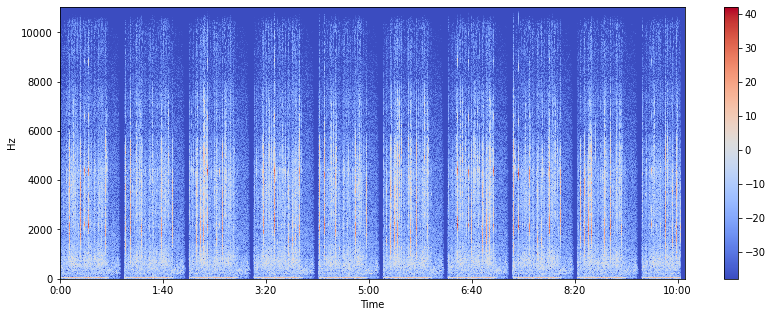

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

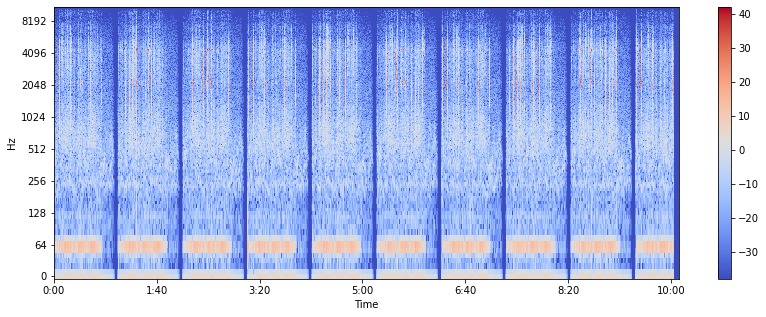

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

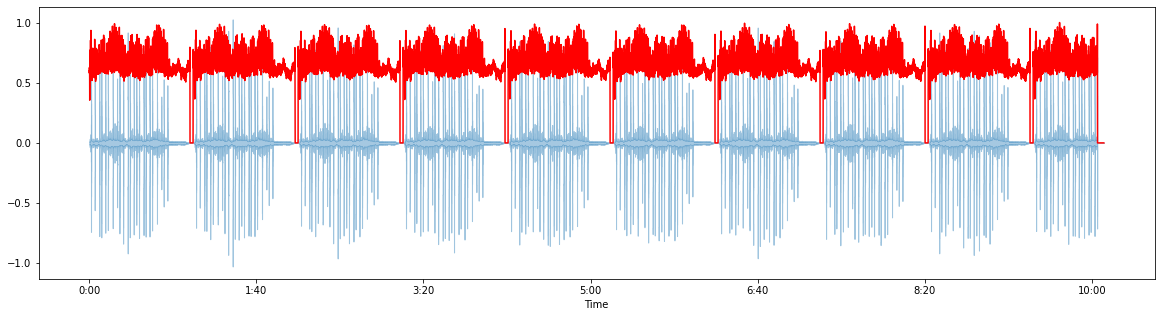

In [175]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Вычисление времени для визуализации
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Нормализация спектрального центроида
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Построение графика
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

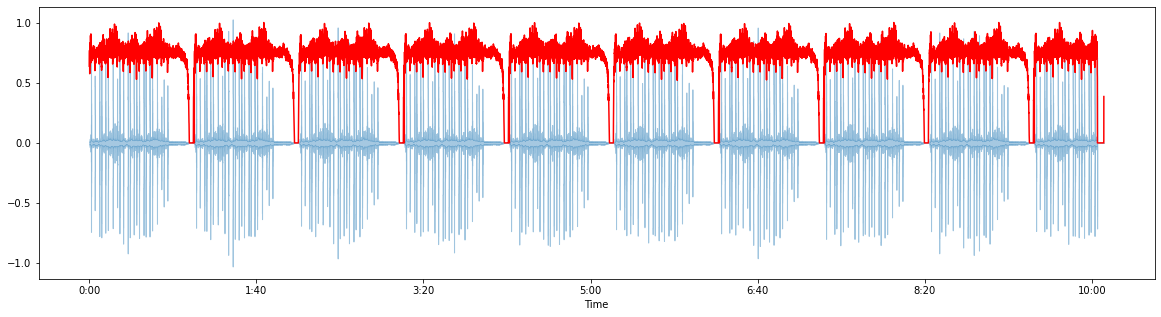

In [173]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

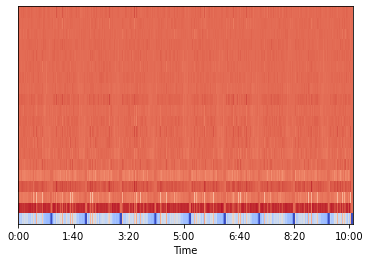

In [176]:
mfccs = librosa.feature.mfcc(x, sr=sr)
# Отображение
librosa.display.specshow(mfccs, sr=sr, x_axis='time') #тепловая карта мел-кепстральных коэффициентов

[-7.5859212e-09 -1.5171842e-08 -4.0847268e-09  8.7529859e-09
 -4.6682591e-09  3.5011944e-09  9.3365182e-09 -3.5011944e-09
  7.0023889e-09 -5.8353242e-09  2.3341296e-09  7.0023889e-09
  0.0000000e+00  3.5011944e-09  5.8353242e-09 -3.5011944e-09
 -6.1270904e-09  6.1270904e-09 -1.3129480e-09  6.4188566e-09]
[1.         1.0000001  0.99999994 1.0000002  1.         0.99999994
 0.99999994 0.99999994 1.0000001  1.0000001  1.         1.0000001
 1.0000001  1.0000001  1.         0.9999998  0.9999998  1.
 1.         1.        ]


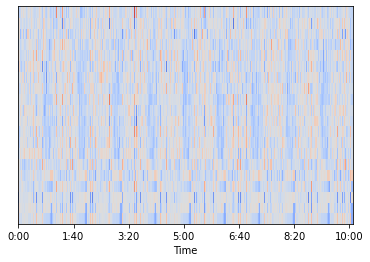

In [177]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))


librosa.display.specshow(mfccs, sr=sr, x_axis='time')

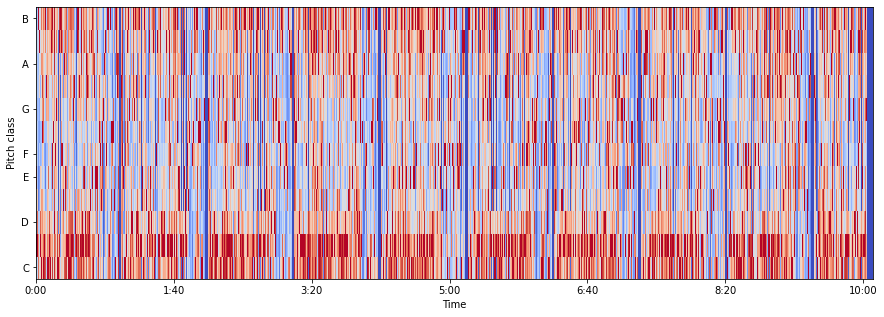

In [179]:
hop_length = 1512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

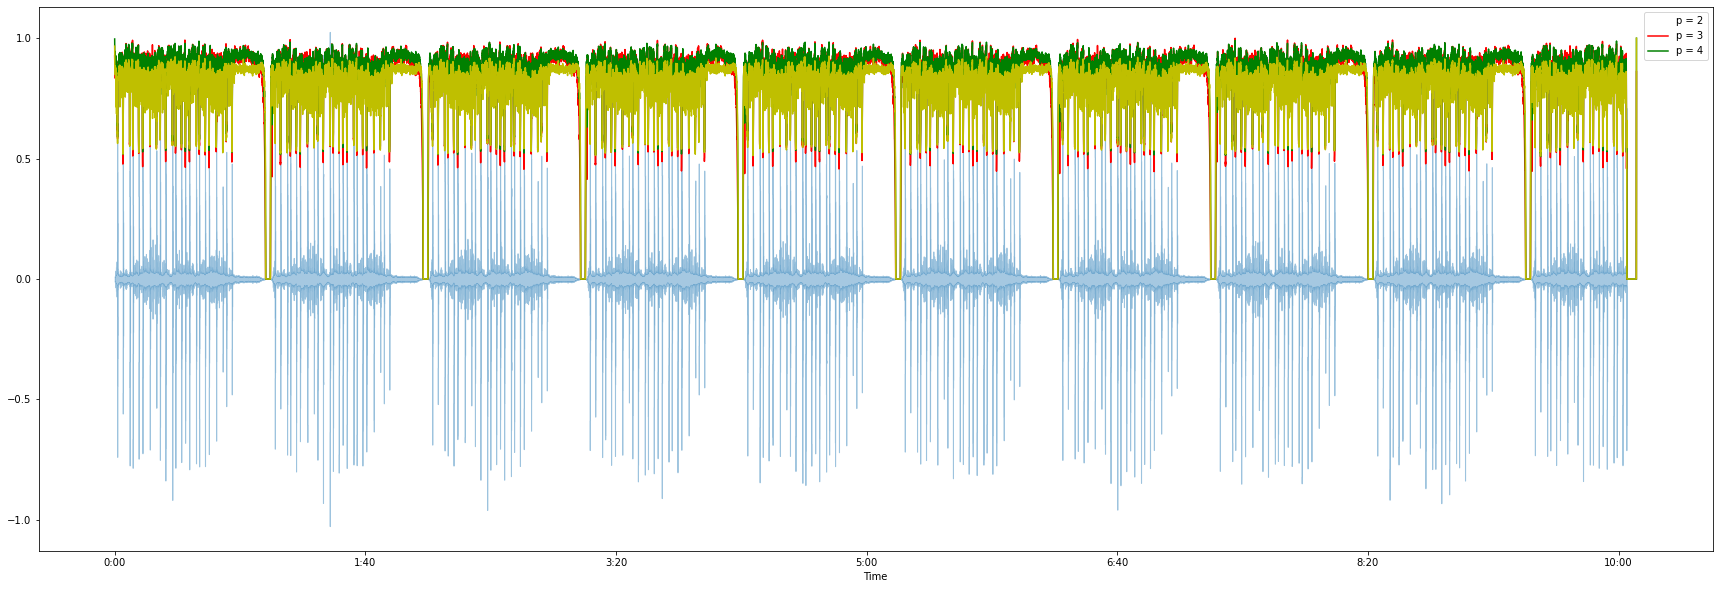

In [181]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(30, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [12]:
print('x:', x, '\n')
print('x shape:', np.shape(x), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', np.shape(x)[0]/sr)

x: [1.9585123e-05 1.5978763e-05 1.1152300e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] 

x shape: (13387992,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 607.1651700680272


In [13]:
audio_file, _ = librosa.effects.trim(x)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [1.9585123e-05 1.5978763e-05 1.1152300e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] 

Audio File shape: (13302784,)


In [14]:
ardea = 'Project/Ardea.ogg'
troglodutes = 'Project/troglodytes.ogg'
pyrrhula = 'Project/pyrrhula.ogg'
passeribus = 'Project/passeribus.ogg'
oenanthe = 'Project/oenanthe.ogg'
nycticoracem = 'Project/nycticoracem.ogg'
fringilla_coelebs = 'Project/fringilla_coelebs.ogg'
erithacus_rubecula = 'Project/erithacus_rubecula.ogg'
alauda_positos = 'Project/alauda_positos.ogg'
emberiza_citrinella = 'Project/emberiza_citrinella.ogg'

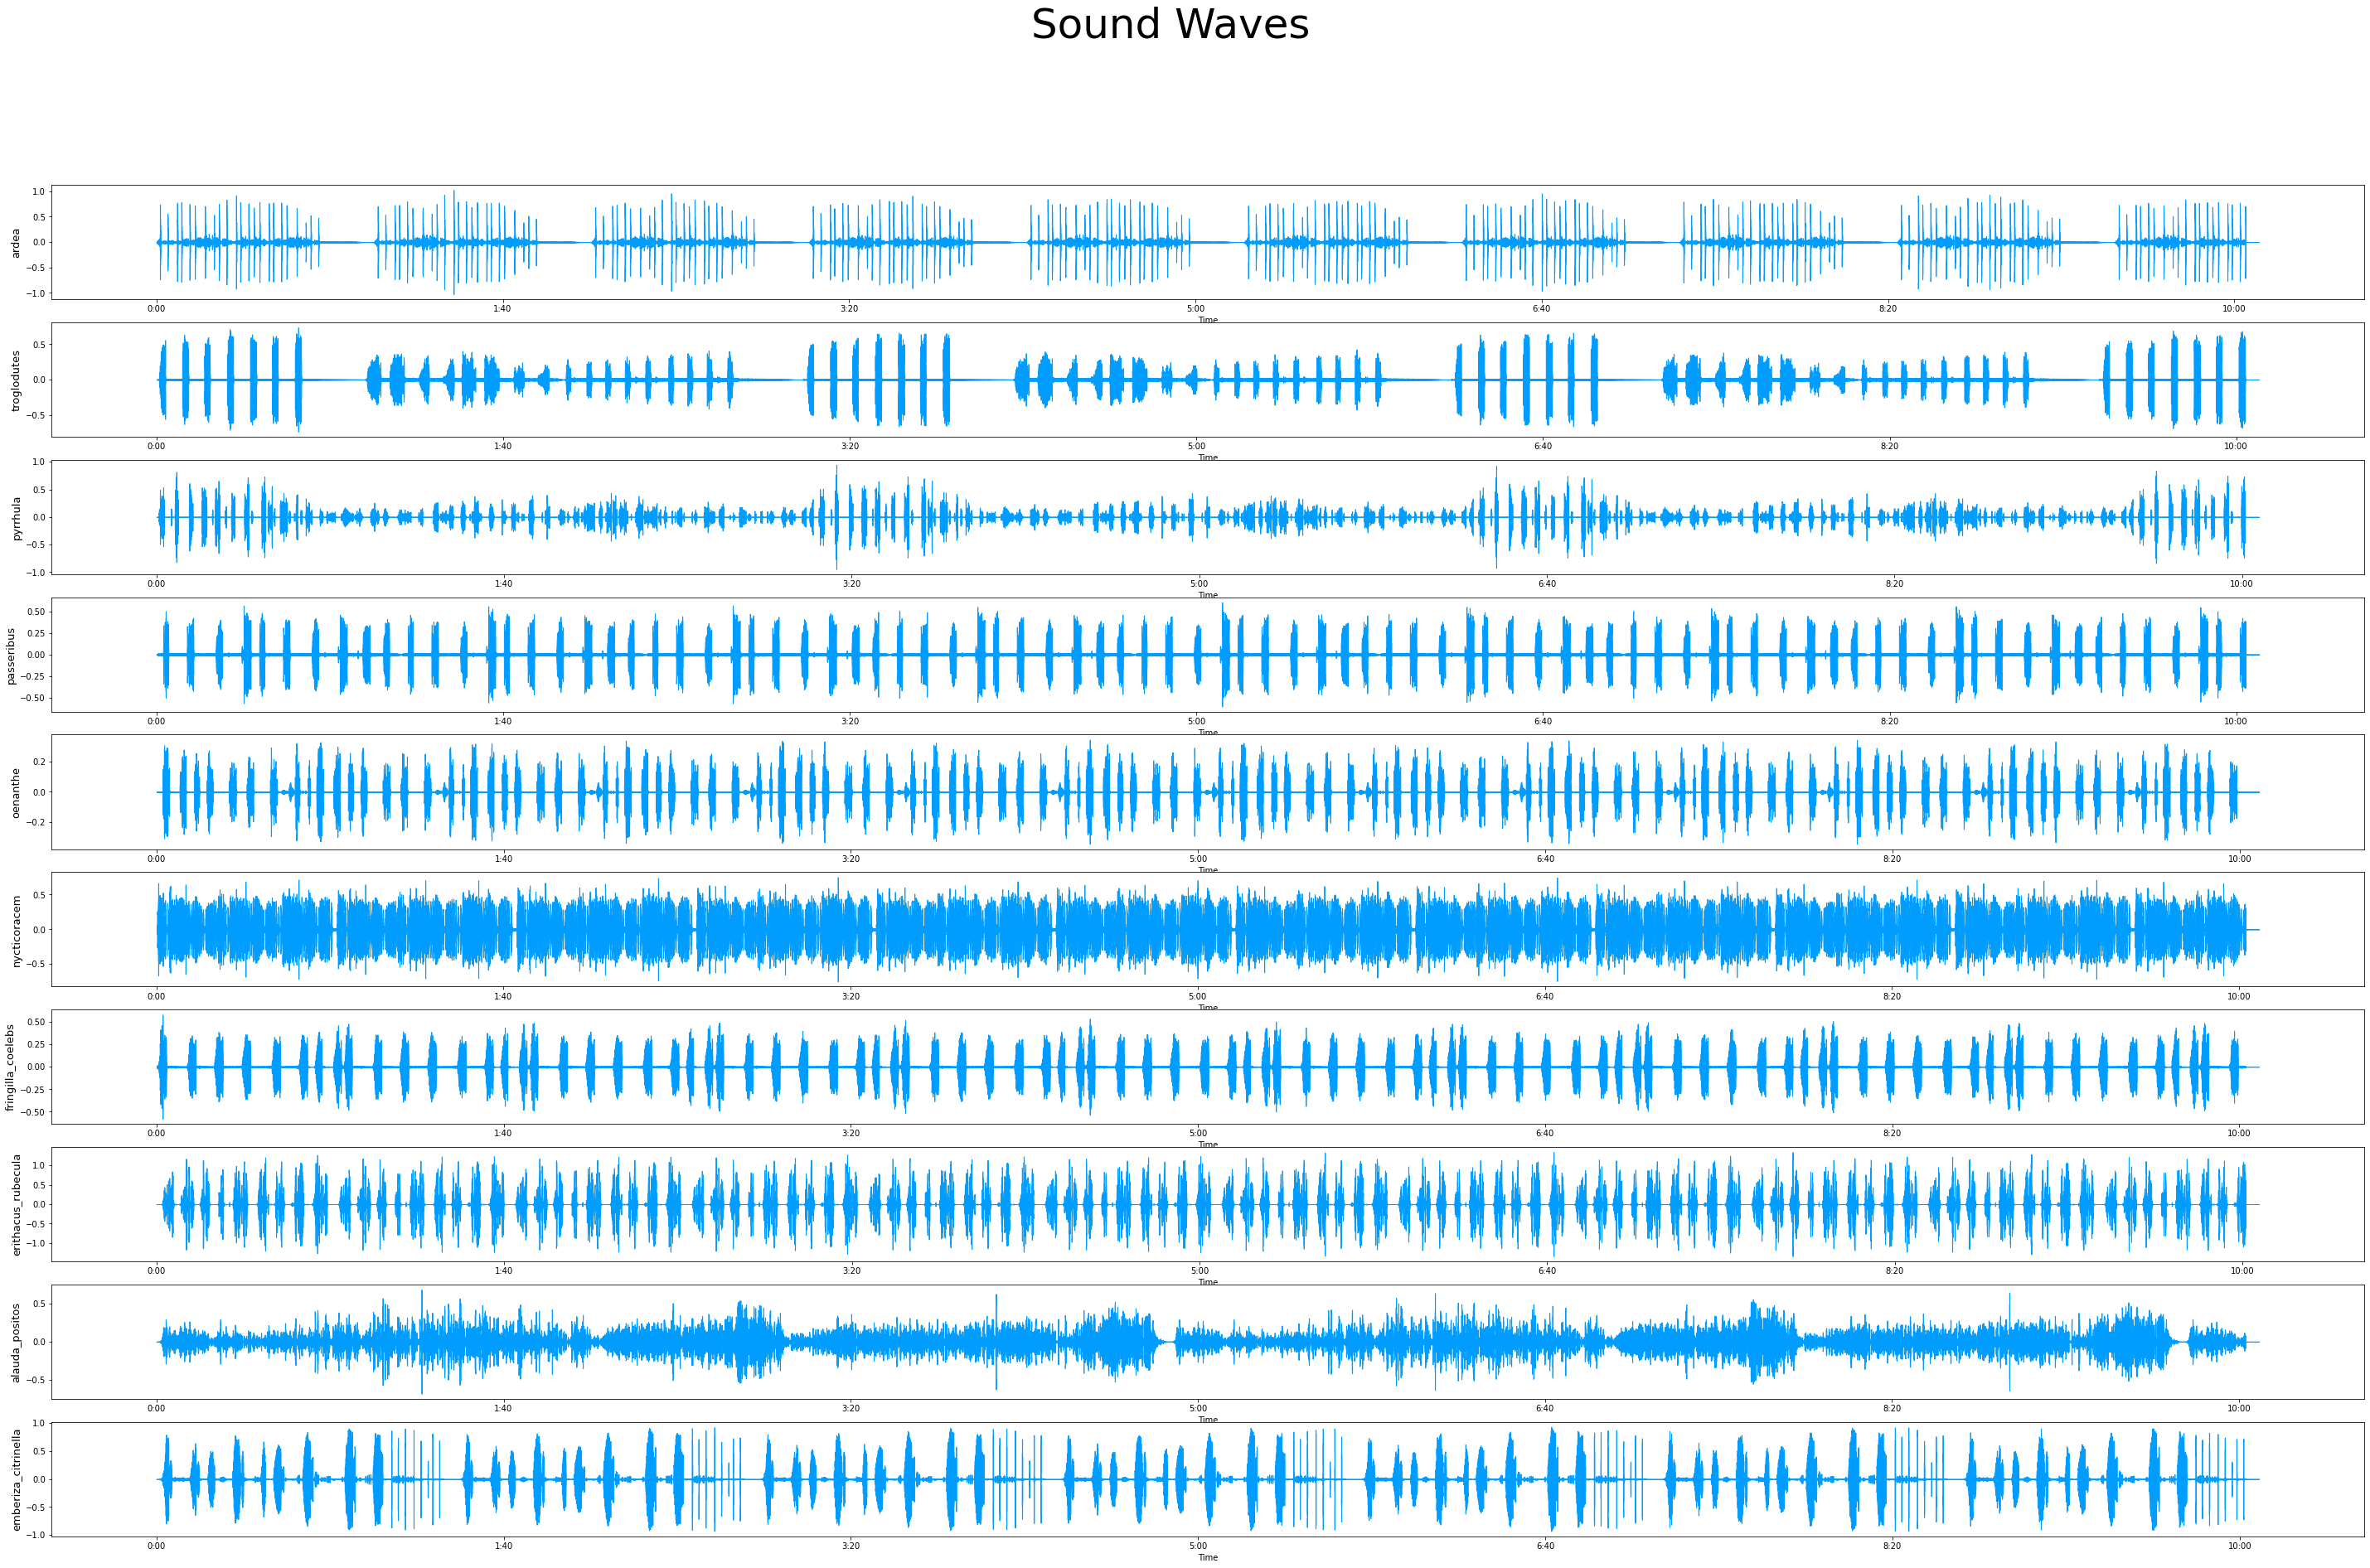

In [15]:
species = [ardea, troglodutes, pyrrhula, passeribus, oenanthe, nycticoracem, fringilla_coelebs, erithacus_rubecula, alauda_positos, emberiza_citrinella]
species_names = ['ardea', 'troglodutes', 'pyrrhula', 'passeribus', 'oenanthe', 'nycticoracem', 'fringilla_coelebs', 'erithacus_rubecula', 'alauda_positos', 'emberiza_citrinella']
key = 0
x, sr, audio = {}, {}, {}

fig, ax = plt.subplots(10, figsize = (50, 30))
fig.suptitle('Sound Waves', fontsize=50)
for i in species:
    x[species_names[key]], sr[species_names[key]] = librosa.load(i)
    audio[species_names[key]], _ = librosa.effects.trim(x[species_names[key]])
    librosa.display.waveshow(y = x[species_names[key]], sr = sr[species_names[key]], color = "#009DFF", ax=ax[key])
    key += 1
    
for i, name in zip(range(10), species_names):
    ax[i].set_ylabel(name, fontsize=13)

In [16]:
hop_length = 512
FT = dict()
key = 0

for i in species_names:
    FT[species_names[key]] = np.abs(librosa.stft(audio[i], hop_length = hop_length))
    key += 1

* Уже начали выделять признаки и выяснилась проблема - на аудиодорожках есть моменты тишины, которые будут нам скорее мешать. Вырежем их.

In [18]:
import json
from pydub import AudioSegment
import ffmpeg

In [19]:
ardea_json = 'Ardea/Ardea.json'
troglodutes_json = 'Troglodytes/troglodytes.json'
pyrrhula_json = 'Pyrrhula/pyrrhula.json'
passeribus_json = 'Passeribus/passeribus.json'
oenanthe_json = 'Oenanthe/oenanthe.json'
nycticoracem_json = 'Nycticoracem/nycticoracem.json'
fringilla_coelebs_json = 'Fringilla-coelebs/fringilla-coelebs.json'
erithacus_rubecula_json = 'Erithacus rubecula/erithacus rubecula.json'
alauda_positos_json = 'Alauda-positos/alauda positos.json'
emberiza_citrinella_json = 'Emberiza citrinella/emberiza citrinella.json'

In [20]:
ardea_mp3 = 'Ardea/Ardea.mp3'
troglodutes_mp3 = 'Troglodytes/troglodytes.mp3'
pyrrhula_mp3 = 'Pyrrhula/pyrrhula.mp3'
passeribus_mp3 = 'Passeribus/passeribus.mp3'
oenanthe_mp3 = 'Oenanthe/oenanthe.mp3'
nycticoracem_mp3 = 'Nycticoracem/nycticoracem.mp3'
fringilla_coelebs_mp3 = 'Fringilla-coelebs/fringilla-coelebs.mp3'
erithacus_rubecula_mp3 = 'Erithacus rubecula/erithacus rubecula.mp3'
alauda_positos_mp3 = 'Alauda-positos/alauda positos.mp3'
emberiza_citrinella_mp3 = 'Emberiza citrinella/emberiza citrinella.mp3'

In [21]:
species_1 = [[ardea_json, ardea_mp3, 'Ardea'], [troglodutes_json, troglodutes_mp3, 'Troglodytes'], \
             [pyrrhula_json, pyrrhula_mp3, 'Pyrrhula'], [passeribus_json, passeribus_mp3, 'Passeribus'], \
             [oenanthe_json, oenanthe_mp3, 'Oenanthe'], \
             [nycticoracem_json, nycticoracem_mp3, 'Nycticoracem'], \
             [fringilla_coelebs_json, fringilla_coelebs_mp3, 'Fringilla-coelebs'], \
             [erithacus_rubecula_json, erithacus_rubecula_mp3, 'Erithacus rubecula'], \
             [alauda_positos_json, alauda_positos_mp3, 'Alauda-positos'], \
             [emberiza_citrinella_json, emberiza_citrinella_mp3, 'Emberiza citrinella']]
print(species_1)

[['Ardea/Ardea.json', 'Ardea/Ardea.mp3', 'Ardea'], ['Troglodytes/troglodytes.json', 'Troglodytes/troglodytes.mp3', 'Troglodytes'], ['Pyrrhula/pyrrhula.json', 'Pyrrhula/pyrrhula.mp3', 'Pyrrhula'], ['Passeribus/passeribus.json', 'Passeribus/passeribus.mp3', 'Passeribus'], ['Oenanthe/oenanthe.json', 'Oenanthe/oenanthe.mp3', 'Oenanthe'], ['Nycticoracem/nycticoracem.json', 'Nycticoracem/nycticoracem.mp3', 'Nycticoracem'], ['Fringilla-coelebs/fringilla-coelebs.json', 'Fringilla-coelebs/fringilla-coelebs.mp3', 'Fringilla-coelebs'], ['Erithacus rubecula/erithacus rubecula.json', 'Erithacus rubecula/erithacus rubecula.mp3', 'Erithacus rubecula'], ['Alauda-positos/alauda positos.json', 'Alauda-positos/alauda positos.mp3', 'Alauda-positos'], ['Emberiza citrinella/emberiza citrinella.json', 'Emberiza citrinella/emberiza citrinella.mp3', 'Emberiza citrinella']]


In [22]:
from tqdm import tqdm

In [28]:
mas = []

for js, mp, sc in tqdm(species_1):
    
    with open(js) as f:
        json_text = f.read()
        
    sound = AudioSegment.from_mp3(mp)
    dictionary = json.loads(json_text)

    part_num = 1

    for elem in dictionary[0]["label"]: #отбираем дорожки без тишины по разметке из соответствующих json'ов
        start = elem["start"] * 1000 # milliseconds
        end = elem["end"] * 1000 # milliseconds
        new_sound = sound[start:end]
        time = len(new_sound)
        if len(new_sound) <= 2000:
            new_sound.export(f"{sc}/parts/part_{part_num}.ogg", format="ogg")
            mas.append(f"{sc}/parts/part_{part_num}.ogg")
            part_num += 1
        else:
            for i in range(0, time, 2000):
                end = start + 2000
                new_sound = sound[start:end]
                new_sound.export(f"{sc}/parts/part_{part_num}.ogg", format="ogg")
                mas.append(f"{sc}/parts/part_{part_num}.ogg")
                part_num += 1
                start += 2000

In [29]:
mas = np.array(mas) #получили не просто 10 видов, а их разбиение по разным частям трели
print(mas.shape)

(1863,)


* Вроде готовы получать признаки

In [139]:
data = pd.DataFrame() #Куда будем заносить все признаки и все дорожки

* Для лучше обработки данных и чтобы они были более информативными, нарежем уже разделённые дорожки по 2 секунды (если меньше уже, как у Ardea, то считаем, что ок)

In [140]:
data.loc[:, 'species'] = mas
data

,species
0,Ardea/parts/part_1.ogg
1,Ardea/parts/part_2.ogg
2,Ardea/parts/part_3.ogg
3,Ardea/parts/part_4.ogg
4,Ardea/parts/part_5.ogg
...,...
1858,Emberiza citrinella/parts/part_143.ogg
1859,Emberiza citrinella/parts/part_144.ogg
1860,Emberiza citrinella/parts/part_145.ogg
1861,Emberiza citrinella/parts/part_146.ogg


In [141]:
key = 0
features, columns = [], []

#разбиваем один получаемый признак на 1025, получается из (1 + n_fft/2) (по умолчанию). 
#Значение по умолчанию соответствует физической длительности 93 миллисекунд при частоте дискретизации 22050 Гц.

for bird in tqdm(mas):
    x , sr = librosa.load(bird)
    x += np.random.normal(0, 0.1, len(x))
    Xdb = np.array(librosa.amplitude_to_db(abs(librosa.stft(x))))
    arr = np.mean(Xdb, axis = 1)
    features.append(arr)

features = np.array(features)

for num in range(len(features[0])):
    columns.append(f"Chromogram_{num}")
    
df = pd.DataFrame(features, columns = columns)

data = pd.concat([data, df], axis = 1)
data

100%|██████████████████████████████████████████████████████████████████████████████| 1863/1863 [02:08<00:00, 14.47it/s]


,species,Chromogram_0,Chromogram_1,Chromogram_2,Chromogram_3,Chromogram_4,Chromogram_5,Chromogram_6,Chromogram_7,Chromogram_8,...,Chromogram_1015,Chromogram_1016,Chromogram_1017,Chromogram_1018,Chromogram_1019,Chromogram_1020,Chromogram_1021,Chromogram_1022,Chromogram_1023,Chromogram_1024
0,Ardea/parts/part_1.ogg,4.637862,8.473748,6.882834,4.681678,4.996445,6.762109,10.230079,10.000896,9.451108,...,5.486460,6.171597,6.300033,5.054436,4.567006,5.255119,8.708314,8.424963,7.518953,4.558663
1,Ardea/parts/part_2.ogg,5.200027,8.028393,5.650130,7.807054,7.597467,9.218699,9.033847,5.183681,6.734795,...,7.811749,6.014370,5.272635,6.525008,6.833857,6.129641,5.206622,7.604848,5.972885,4.892749
2,Ardea/parts/part_3.ogg,7.187174,6.310520,4.286380,4.927340,6.656519,7.347494,9.209917,6.777288,5.935441,...,5.722974,4.778478,8.154408,7.436652,5.065679,7.564401,7.639675,7.968014,8.579982,6.455093
3,Ardea/parts/part_4.ogg,7.408572,7.326387,2.459181,3.801460,4.307845,7.130138,6.021622,5.895909,6.168558,...,5.791980,5.449099,5.971461,3.853388,5.251414,5.410809,5.217443,8.004998,6.355225,2.135294
4,Ardea/parts/part_5.ogg,5.550548,7.454733,7.144615,6.694797,7.451774,10.225578,9.845662,4.289994,5.989278,...,6.341081,5.546722,8.420621,7.420338,3.632676,4.216579,5.197605,6.462411,4.565505,1.870319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,Emberiza citrinella/parts/part_143.ogg,1.970242,5.250010,3.999229,5.400523,5.834236,5.126042,4.207061,4.992309,6.895732,...,6.608890,5.106518,7.191051,8.172064,5.448818,8.095590,6.451699,5.760639,7.695753,6.221913
1859,Emberiza citrinella/parts/part_144.ogg,2.796927,8.443696,5.447759,7.608287,5.352318,5.451807,6.211551,5.402476,5.317625,...,8.427823,6.612635,6.837243,4.695741,5.664891,6.541541,5.072717,5.785624,3.533690,-2.931479
1860,Emberiza citrinella/parts/part_145.ogg,1.542883,5.625442,6.608752,6.808776,4.312400,3.765775,4.474466,5.147784,5.169673,...,5.975459,7.524479,7.129043,8.101106,7.505647,5.906838,4.561973,5.832896,6.751677,2.315528
1861,Emberiza citrinella/parts/part_146.ogg,-0.333705,3.934064,3.769319,5.324129,7.065177,3.657696,2.937760,4.967683,5.370570,...,8.116179,5.825854,2.810356,5.838508,7.495413,5.812129,3.678393,3.497655,7.646846,5.014159


In [142]:
key = 0
hop_length = 512
features, columns = [], []

#разбиение похоже на то, что у первого признака

for bird in tqdm(mas):
    x, sr = librosa.load(bird)
    x += np.random.normal(0, 0.1, len(x))
    audio, _ = librosa.effects.trim(x)
    FT = np.array(np.abs(librosa.stft(audio, hop_length = hop_length)))
    arr = np.mean(FT, axis = 1)
    features.append(arr)

features = np.array(features)

for num in range(len(features[0])):
    columns.append(f"Fourier_{num}")
    
df = pd.DataFrame(features, columns = columns)

data = pd.concat([data, df], axis = 1)
data

100%|██████████████████████████████████████████████████████████████████████████████| 1863/1863 [02:16<00:00, 13.62it/s]


,species,Chromogram_0,Chromogram_1,Chromogram_2,Chromogram_3,Chromogram_4,Chromogram_5,Chromogram_6,Chromogram_7,Chromogram_8,...,Fourier_1015,Fourier_1016,Fourier_1017,Fourier_1018,Fourier_1019,Fourier_1020,Fourier_1021,Fourier_1022,Fourier_1023,Fourier_1024
0,Ardea/parts/part_1.ogg,4.637862,8.473748,6.882834,4.681678,4.996445,6.762109,10.230079,10.000896,9.451108,...,2.509116,1.817466,2.264278,2.264725,2.234101,2.131227,3.016149,2.898775,3.155830,3.128072
1,Ardea/parts/part_2.ogg,5.200027,8.028393,5.650130,7.807054,7.597467,9.218699,9.033847,5.183681,6.734795,...,2.710020,2.735121,2.447482,2.542610,2.842533,2.761865,2.777943,2.804171,2.530610,2.694263
2,Ardea/parts/part_3.ogg,7.187174,6.310520,4.286380,4.927340,6.656519,7.347494,9.209917,6.777288,5.935441,...,2.557975,2.055358,2.198617,1.737519,2.026161,2.508425,2.139703,2.316038,2.577665,2.620586
3,Ardea/parts/part_4.ogg,7.408572,7.326387,2.459181,3.801460,4.307845,7.130138,6.021622,5.895909,6.168558,...,2.074186,2.456520,2.796538,1.726129,1.355831,1.862670,2.121981,2.848269,2.394568,1.760904
4,Ardea/parts/part_5.ogg,5.550548,7.454733,7.144615,6.694797,7.451774,10.225578,9.845662,4.289994,5.989278,...,1.908342,1.876656,2.213939,2.172476,2.349196,3.100044,3.179848,2.246693,1.749539,1.751779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,Emberiza citrinella/parts/part_143.ogg,1.970242,5.250010,3.999229,5.400523,5.834236,5.126042,4.207061,4.992309,6.895732,...,2.651310,2.814371,2.813298,2.810685,2.783804,2.547605,2.891881,2.241409,1.688927,1.833109
1859,Emberiza citrinella/parts/part_144.ogg,2.796927,8.443696,5.447759,7.608287,5.352318,5.451807,6.211551,5.402476,5.317625,...,2.813336,2.086180,2.112519,2.665558,2.876138,2.764791,2.720821,2.678880,2.612001,1.705644
1860,Emberiza citrinella/parts/part_145.ogg,1.542883,5.625442,6.608752,6.808776,4.312400,3.765775,4.474466,5.147784,5.169673,...,2.880572,2.548800,2.391208,1.940739,2.499688,2.664928,3.109432,2.577378,2.126237,1.826140
1861,Emberiza citrinella/parts/part_146.ogg,-0.333705,3.934064,3.769319,5.324129,7.065177,3.657696,2.937760,4.967683,5.370570,...,1.734694,2.060460,2.395385,2.746009,2.122455,1.740054,1.457085,2.322578,2.369480,2.076472


In [143]:
features, columns = [], []

for bird in tqdm(mas):
    x, sr = librosa.load(bird)
    x += np.random.normal(0, 0.1, len(x))
    mfccs = librosa.feature.mfcc(x, sr=sr)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    arr = np.mean(mfccs, axis = 1)
    features.append(arr)

features = np.array(features)

for num in range(len(features[0])):
    columns.append(f"Mel-frequency_{num}")
    
df = pd.DataFrame(features, columns = columns)
data = pd.concat([data, df], axis = 1)
data

100%|██████████████████████████████████████████████████████████████████████████████| 1863/1863 [03:37<00:00,  8.58it/s]


,species,Chromogram_0,Chromogram_1,Chromogram_2,Chromogram_3,Chromogram_4,Chromogram_5,Chromogram_6,Chromogram_7,Chromogram_8,...,Mel-frequency_10,Mel-frequency_11,Mel-frequency_12,Mel-frequency_13,Mel-frequency_14,Mel-frequency_15,Mel-frequency_16,Mel-frequency_17,Mel-frequency_18,Mel-frequency_19
0,Ardea/parts/part_1.ogg,4.637862,8.473748,6.882834,4.681678,4.996445,6.762109,10.230079,10.000896,9.451108,...,2.438372e-08,1.253052e-08,0.000000e+00,5.418604e-09,2.167442e-08,-1.354651e-08,-1.083721e-08,0.000000e+00,1.083721e-08,-8.127906e-09
1,Ardea/parts/part_2.ogg,5.200027,8.028393,5.650130,7.807054,7.597467,9.218699,9.033847,5.183681,6.734795,...,-1.241763e-09,-1.986822e-08,1.986822e-08,0.000000e+00,-2.483527e-09,4.967054e-09,0.000000e+00,2.483527e-09,4.967054e-09,0.000000e+00
2,Ardea/parts/part_3.ogg,7.187174,6.310520,4.286380,4.927340,6.656519,7.347494,9.209917,6.777288,5.935441,...,1.986822e-08,9.934108e-09,0.000000e+00,9.934108e-09,1.241763e-08,9.934108e-09,0.000000e+00,0.000000e+00,0.000000e+00,7.450581e-09
3,Ardea/parts/part_4.ogg,7.408572,7.326387,2.459181,3.801460,4.307845,7.130138,6.021622,5.895909,6.168558,...,0.000000e+00,1.490116e-08,-3.725290e-09,0.000000e+00,-7.450581e-09,1.490116e-08,7.450581e-09,1.117587e-08,-1.490116e-08,0.000000e+00
4,Ardea/parts/part_5.ogg,5.550548,7.454733,7.144615,6.694797,7.451774,10.225578,9.845662,4.289994,5.989278,...,1.083721e-08,2.582303e-09,1.083721e-08,-1.354651e-09,1.896511e-08,-1.354651e-09,1.625581e-08,-5.418604e-09,8.127906e-09,-6.773255e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,Emberiza citrinella/parts/part_143.ogg,1.970242,5.250010,3.999229,5.400523,5.834236,5.126042,4.207061,4.992309,6.895732,...,3.311369e-09,1.324548e-08,-9.934108e-09,-2.317958e-08,6.622738e-09,0.000000e+00,-1.324548e-08,-6.622738e-09,0.000000e+00,0.000000e+00
1859,Emberiza citrinella/parts/part_144.ogg,2.796927,8.443696,5.447759,7.608287,5.352318,5.451807,6.211551,5.402476,5.317625,...,-5.960465e-09,-5.960465e-09,8.940697e-09,-2.980232e-09,9.313226e-09,1.341104e-08,-1.490116e-09,-1.192093e-08,1.937151e-08,1.192093e-08
1860,Emberiza citrinella/parts/part_145.ogg,1.542883,5.625442,6.608752,6.808776,4.312400,3.765775,4.474466,5.147784,5.169673,...,0.000000e+00,1.833989e-08,0.000000e+00,1.948613e-08,-9.169946e-09,-9.169946e-09,0.000000e+00,-1.748021e-08,0.000000e+00,-1.833989e-08
1861,Emberiza citrinella/parts/part_146.ogg,-0.333705,3.934064,3.769319,5.324129,7.065177,3.657696,2.937760,4.967683,5.370570,...,-2.980232e-08,0.000000e+00,0.000000e+00,-1.490116e-08,0.000000e+00,-2.980232e-08,0.000000e+00,0.000000e+00,0.000000e+00,-7.450581e-09


In [144]:
data.to_csv('Birdcall features.csv', header=False, index=False)

In [145]:
answers = pd.DataFrame()
answ = []
k = 1
for _, _, species in species_1: #небольшой цикл для генерации ответов
    for name in mas:
        if species in name:
            answ.append(k)
    k += 1

    
answ = np.array(answ)
print(mas.shape)
print(answ.shape)

(1863,)
(1863,)


In [146]:
answers.loc[:, 'answers'] = answ
answers

,answers
0,1
1,1
2,1
3,1
4,1
...,...
1858,10
1859,10
1860,10
1861,10


In [147]:
answers.to_csv('Birdcall answers.csv', header=False, index=False)

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], answers, test_size = 0.3)
#разделяем выборки

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [161]:
forest = RandomForestClassifier(max_depth = 8) 
forest.fit(X_train, y_train) #тренируем рандомный лес
y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.851520572450805

In [152]:
gdbs = GradientBoostingClassifier(max_depth = 4)
gdbs.fit(X_train, y_train) #тренируем бустинг
y_predict=gdbs.predict(X_test)

accuracy_score(y_test, y_predict)

0.9087656529516994

* Посмотрим на матрицу корреляции для наглядности

In [153]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_predict, y_test) 

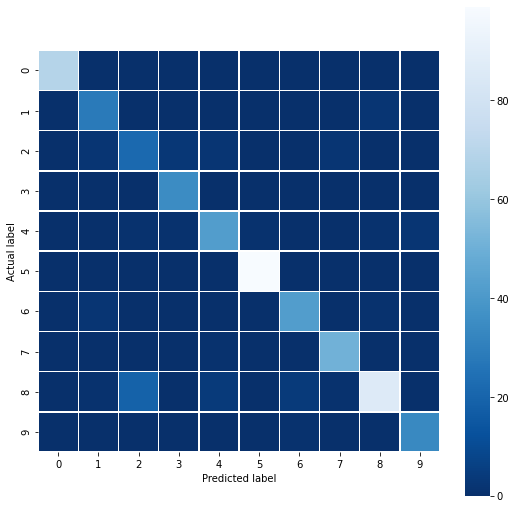

In [166]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Выводы
* сборка датафрейма с призаками с нуля - непростая задача;
* работать со звуковыми дорожками - сложно;
* Градиентный бустинг работает сильно дольше, но даже при меньшей глубине деревьев даёт высокую точность. Чтобы добиться примерно похожей точности от случайного леса потребовалось увеличить глубину деревьев в два раза.
* несколько раз мы думали, что это просто худшая задача, но главное - не расстраиваться. Если не расстроились - не сдаваться.